In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.head())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     2.0     5.0  5132022       5    13   2022    1100.0  2022000436   
1     9.0     1.0  2282022       2    28   2022    1200.0  2022005381   
2    19.0     1.0  1202022       1    20   2022    1100.0  2022000927   
3    39.0     8.0  8122022       8    12   2022    1100.0  2022014408   
4    25.0     7.0  7222022       7    22   2022    1200.0  2022010910   

           _PSU  CTELENM1  ...  DRNKANY6      DROCDY4_  _RFBING6  \
0  2.022000e+09       1.0  ...       1.0  2.700000e+01       1.0   
1  2.022005e+09       NaN  ...       9.0  9.000000e+02       9.0   
2  2.022001e+09       1.0  ...       2.0  5.397605e-79       1.0   
3  2.022014e+09       NaN  ...       2.0  5.397605e-79       1.0   
4  2.022011e+09       NaN  ...       1.0  1.700000e+01       2.0   

       _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  ID  TARGET  
0  1.870000e+02       1.0       1.0       1.0       2.0   0    True  
1  9.990000e

# Colonnes à éliminer 

## Tri manuel (bulle)

- FMONTH
- IDATE
- IMONTH
- IYEAR
- SEQNO
- _PSU
- CTELENM1 -> virer si value = 2 puis virer la colonne
- PVTRESD1
- COLGHOUS
- STATERE1
- CELPHON1
- LADULT1 -> VIRER SI VALUE = 2 PUIS VIRER COLONNE
- COLGSEX1
- NUMADULT
- NUMMEN
- NUMWOMEN
- RESPSLCT
- LANDSEX1
- CELLSEX1
- SAFETIME
- CTELNUM1
- CELLFON5
- CADULT1
- PVTRESD3
- CCLGHOUS
- CSTATE1
- LANDLINE
- HHADULT
- LASTDEN4
- RMVTETH4
- NUMHHOL4
- VIRCOLO1
- TOLDCFS
- HAVECFS
- WORKCFS
- CAREGIV1
- CRGVREL4
- CSRVSUM
- CRGVLNG1
- CRGVHRS1
- CRGVPRB3
- CRGVALZD
- CRGVPER1
- CRGVHOU1
- CRGVEXPT
- FIREARM5
- GUNLOAD
- LOADULK2
- RCSGEND1
- RCSXBRTH
- RCSRLTN2
- CASTHDX2
- CASTHNO2
- BIRTHSEX
- WHEREGET
- NOBCUSE8
- RRCOGNT2
- QSTVER
- QSTLANG
- _STSTR
- _STRWT
- _RAWRAKE
- _WT2RAKE
- CAGEG
- _CLLCPWT
- _DUALUSE
- _DUALCOR
- _LLCPWT2
- _LLCPWT
- _EXTETH3
- _ALTETH3
- _DENVST3
- _PRACE2


In [4]:
df_réduit = df_train.drop(columns=[
    'FMONTH', 'IDATE', 'IMONTH', 'IYEAR', 'SEQNO', '_PSU', 'CTELENM1', 
    'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 
    'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'LANDSEX1', 'CELLSEX1', 
    'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 
    'CSTATE1', 'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'NUMHHOL4', 
    'VIRCOLO1', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'CAREGIV1', 'CRGVREL4', 
    'CSRVSUM', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 
    'CRGVHOU1', 'CRGVEXPT', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 
    'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'WHEREGET', 
    'NOBCUSE8', 'RRCOGNT2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', 
    '_RAWRAKE', '_WT2RAKE', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', 
    '_LLCPWT2', '_LLCPWT', '_EXTETH3', '_ALTETH3', '_DENVST3', '_PRACE2'
])

df_test = df_test.drop(columns=[
    'FMONTH', 'IDATE', 'IMONTH', 'IYEAR', 'SEQNO', '_PSU', 'CTELENM1', 
    'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 
    'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'LANDSEX1', 'CELLSEX1', 
    'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'PVTRESD3', 'CCLGHOUS', 
    'CSTATE1', 'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'NUMHHOL4', 
    'VIRCOLO1', 'TOLDCFS', 'HAVECFS', 'WORKCFS', 'CAREGIV1', 'CRGVREL4', 
    'CSRVSUM', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD', 'CRGVPER1', 
    'CRGVHOU1', 'CRGVEXPT', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 
    'RCSXBRTH', 'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'WHEREGET', 
    'NOBCUSE8', 'RRCOGNT2', 'QSTVER', 'QSTLANG', '_STSTR', '_STRWT', 
    '_RAWRAKE', '_WT2RAKE', 'CAGEG', '_CLLCPWT', '_DUALUSE', '_DUALCOR', 
    '_LLCPWT2', '_LLCPWT', '_EXTETH3', '_ALTETH3', '_DENVST3', '_PRACE2'
])

In [5]:
df_réduit['TARGET'] = df_réduit['TARGET'].astype(int)

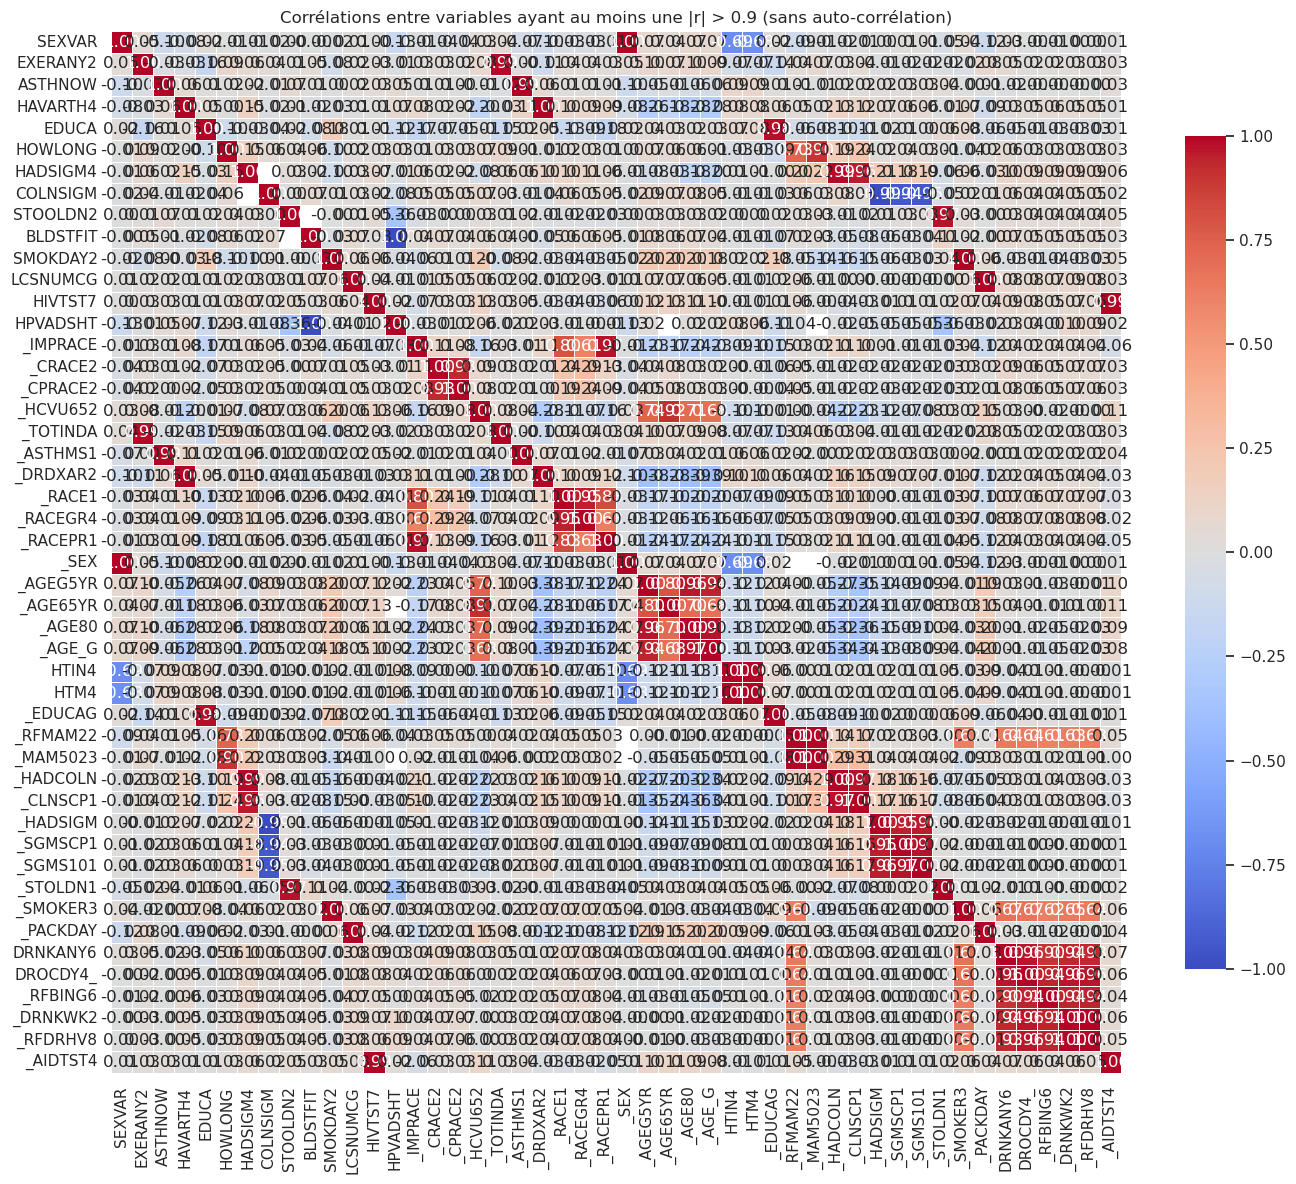

Nombre de paires avec |corr| > 0.9 : 39
Nombre de variables concernées : 48
   feature_1 feature_2      corr
0   HAVARTH4  _DRDXAR2  1.000000
1   _RFMAM22  _MAM5023  1.000000
2   BLDSTFIT  HPVADSHT -1.000000
3   LCSNUMCG  _PACKDAY  1.000000
4      HTIN4      HTM4  0.999628
5   SMOKDAY2  _SMOKER3  0.997445
6   _DRNKWK2  _RFDRHV8  0.996869
7     SEXVAR      _SEX  0.996477
8    ASTHNOW  _ASTHMS1  0.994255
9   COLNSIGM  _HADSIGM -0.993942
10   HIVTST7  _AIDTST4  0.992936
11  EXERANY2  _TOTINDA  0.991966
12  HADSIGM4  _HADCOLN  0.988280
13     EDUCA   _EDUCAG  0.979516
14  _SGMSCP1  _SGMS101  0.974233
15    _AGE80    _AGE_G  0.974025
16  STOOLDN2  _STOLDN1  0.971689
17  _IMPRACE  _RACEPR1  0.971256
18  _HADCOLN  _CLNSCP1  0.968849
19  _AGEG5YR    _AGE80  0.964468
20  DROCDY4_  _DRNKWK2  0.963520
21  DROCDY4_  _RFDRHV8  0.963157
22  DRNKANY6  DROCDY4_  0.961511
23  _HADSIGM  _SGMS101  0.959680
24  HADSIGM4  _CLNSCP1  0.959382
25  COLNSIGM  _SGMS101 -0.952474
26    _RACE1  _RACEGR4  0.951703


In [18]:
# Calcul de la matrice de corrélation et affichage en ne gardant que |corr| > 0.5
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes numériques
num_df = df_réduit.select_dtypes(include='number').copy()
corr_df = num_df.corr()

# Seuil
threshold = 0.9

# Mettre la diagonale à 0 pour ne pas compter les auto-corrélations
corr_no_diag = corr_df.copy()
np.fill_diagonal(corr_no_diag.values, 0)

# Identifier les colonnes ayant au moins une corrélation > threshold
mask_threshold = corr_no_diag.abs() > threshold
cols_to_keep = mask_threshold.any(axis=0)
selected_cols = corr_df.columns[cols_to_keep].tolist()

# Filtrer la matrice de corrélation
filtered_corr_matrix = corr_df.loc[selected_cols, selected_cols]

# Affichage de la heatmap
plt.figure(figsize=(14, 12))
sns.set(style='white')
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title(f'Corrélations entre variables ayant au moins une |r| > {threshold} (sans auto-corrélation)')
plt.tight_layout()
plt.show()

# Extraire la liste des paires de variables avec |corr| > threshold (sans doublons i-j / j-i)
high_corr_filtered = corr_no_diag.where(corr_no_diag.abs() > threshold)
high_corr = high_corr_filtered.stack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'corr']

# Normaliser l'ordre des paires pour supprimer les duplicatas
high_corr['pair'] = high_corr.apply(lambda x: tuple(sorted([x['feature_1'], x['feature_2']])), axis=1)
high_corr = high_corr.drop_duplicates('pair').drop(columns='pair')

# Trier par valeur absolue de corrélation décroissante et afficher
high_corr = high_corr.reindex(high_corr['corr'].abs().sort_values(ascending=False).index)
print(f"Nombre de paires avec |corr| > {threshold} :", len(high_corr))
print(f"Nombre de variables concernées : {len(selected_cols)}")
print(high_corr.reset_index(drop=True))

In [19]:
# Déterminer et afficher les features numériques dont la corrélation (valeur absolue) avec TARGET est < 0.1
# (utilise num_df déjà défini dans le notebook)
corr_with_target = num_df.corr()['TARGET'].drop('TARGET')
abs_corr = corr_with_target.abs()

low_corr = corr_with_target[abs_corr < 0.05].sort_values(key=lambda s: s.abs())

print(f"Nombre de features numériques avec |corr| < 0.1 : {len(low_corr)}")
print(low_corr)

Nombre de features numériques avec |corr| < 0.1 : 184
ID          0.000135
ASBIDRNK   -0.000325
_STATE      0.000336
RRCLASS3    0.000477
COVIDSMP   -0.000626
              ...   
CDASSIST   -0.048238
COVIDFS1    0.048845
COLNSIGM    0.048967
DIFFDRES   -0.049127
_RACEPR1   -0.049708
Name: TARGET, Length: 184, dtype: float64


In [20]:
# Supprimer les features numériques faiblement corrélées avec TARGET (|corr| < 0.1)
to_drop = [c for c in low_corr.index if c in df_réduit.columns]
df_réduit.drop(columns=to_drop, inplace=True)

# Mettre à jour num_df pour refléter la nouvelle dataframe réduite
num_df = df_réduit.select_dtypes(include='number').copy()

print(f"Colonnes supprimées ({len(to_drop)}):", to_drop)
print("Nouvelle forme de df_réduit :", df_réduit.shape)

Colonnes supprimées (184): ['ID', 'ASBIDRNK', '_STATE', 'RRCLASS3', 'COVIDSMP', 'COVIDPRM', 'IDAY', 'COLNCNCR', 'SDHSTRE1', 'DIABTYPE', 'NUMPHON4', 'INCOME3', 'ACESWEAR', 'ACEDRINK', 'LCSSCNCR', 'MAXDRNKS', 'PERSDOC3', 'CSRVINSR', 'TYPCNTR9', 'USENOW3', 'MEDCOST1', 'PSATEST1', 'CERVSCRN', 'PREGNANT', 'RRTREAT', 'SMALSTOL', 'ACEPRISN', 'ACETTHEM', 'CSRVPAIN', 'COVIDPOS', 'RRHCARE4', 'CSRVTRT3', 'SOFEMALE', 'RRPHYSM2', 'DRNKANY6', 'BRTHCNT4', 'TRNSGNDR', 'BCPREFER', 'HPVADVC4', '_HLTHPLN', 'CNCRTYP2', '_RFSMOK3', 'AVEDRNK3', 'ACEDRUGS', '_RFMAM22', 'LCSNUMCG', 'ACETOUCH', 'ASBIRDUC', 'SDHUTILS', '_SBONTI1', '_RFBLDS5', 'ACEDEPRS', 'CHKHEMO3', 'ASBIADVC', 'STOOLDN2', 'SDHBILLS', 'CSRVCLIN', 'HADSEX', '_CPRACE2', '_CRACE2', 'ACEDIVRC', 'ASBIALCH', 'PCPSARS2', 'CSRVCTL2', 'DIABEYE1', 'ACEPUNCH', '_CURECI2', '_DRNKWK2', '_RACEG22', 'ACEHVSEX', 'ACEADSAF', 'HEATTBCO', '_MRACE2', 'LASTSMK2', 'HIVRISK5', '_STOLDN1', 'RRATWRK2', 'DROCDY4_', 'ACEADNED', '_HISPANC', 'HTIN4', 'MENTCIGS', '_RFDRHV8'

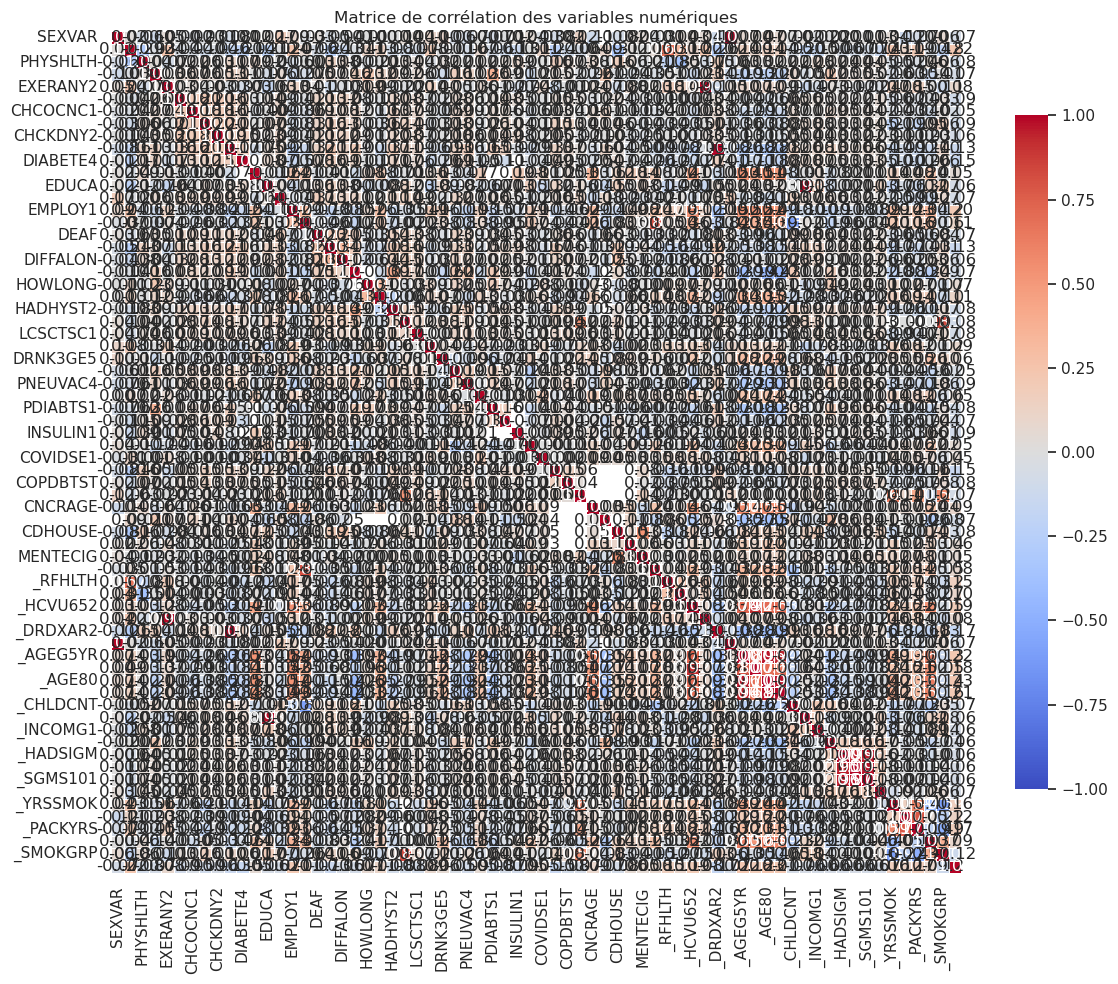

In [21]:
# Calcul de la matrice de corrélation et affichage en heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques (on retire les colonnes 'Unnamed: 0' si présentes)
num_df = df_réduit.select_dtypes(include='number').copy()

corr_df = num_df.corr()

# Affichage de la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.set(style='white')
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

In [6]:
df_réduit = df_réduit.drop(columns = ['_DRDXAR2', '_AGE80', '_AGEG5YR', '_AGE65YR'])

df_test = df_test.drop(columns = ['_DRDXAR2', '_AGE80', '_AGEG5YR', '_AGE65YR'])

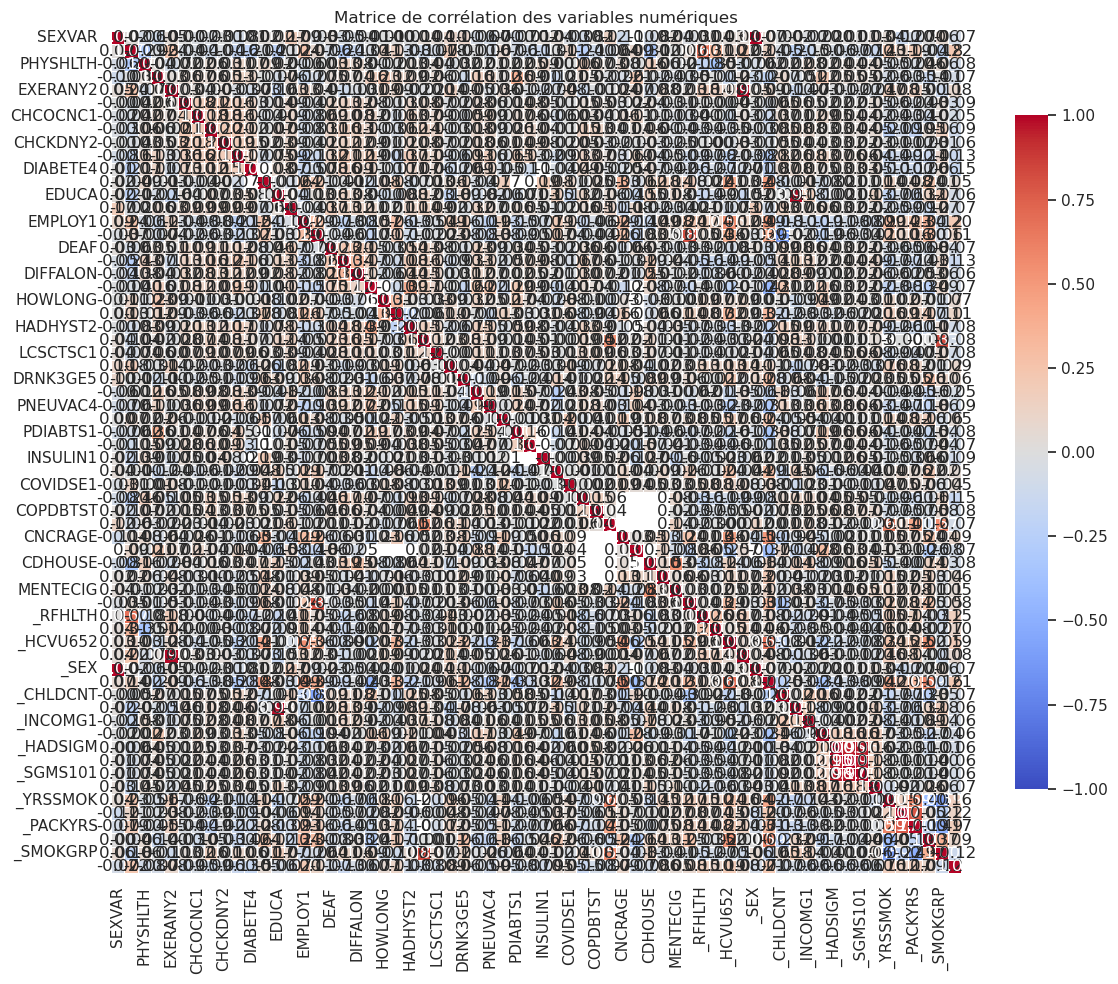

In [23]:
# Calcul de la matrice de corrélation et affichage en heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques (on retire les colonnes 'Unnamed: 0' si présentes)
num_df = df_réduit.select_dtypes(include='number').copy()

corr_df = num_df.corr()

# Affichage de la matrice de corrélation avec seaborn
plt.figure(figsize=(12, 10))
sns.set(style='white')
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()

In [28]:
df_réduit.head()

SEXVAR  GENHLTH  PHYSHLTH  CHECKUP1  EXERANY2  CVDSTRK3  CHCOCNC1  \
0     2.0      3.0      30.0       1.0       1.0       2.0       1.0   
1     2.0      3.0      88.0       3.0       2.0       2.0       2.0   
2     1.0      2.0      88.0       1.0       1.0       2.0       2.0   
3     1.0      3.0      88.0       1.0       1.0       2.0       2.0   
4     1.0      3.0      88.0       1.0       1.0       2.0       2.0   

   CHCCOPD3  CHCKDNY2  HAVARTH4  ...  _HADSIGM  _SGMSCP1  _SGMS101  _VIRCOL1  \
0       2.0       1.0       1.0  ...       2.0       NaN       NaN       NaN   
1       2.0       2.0       2.0  ...       NaN       NaN       NaN       NaN   
2       2.0       2.0       2.0  ...       NaN       NaN       NaN       NaN   
3       2.0       2.0       2.0  ...       2.0       3.0       3.0       3.0   
4       2.0       2.0       2.0  ...       NaN       NaN       NaN       NaN   

   _YRSSMOK  _PACKDAY  _PACKYRS  _YRSQUIT  _SMOKGRP  TARGET  
0      22.0      2.00      44.0      46.0       3.0       1  
1       NaN       NaN       NaN       NaN       4.0       0  
2       9.0      0.75       7.0      13.0       3.0       0  
3       NaN       NaN       NaN       NaN       4.0       0  
4       NaN       NaN       NaN       NaN       4.0       0  

[5 rows x 64 columns]

In [7]:
X_train, y_train = df_réduit.drop(columns=['TARGET']), df_réduit['TARGET']

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Split train en train/validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 2. Définir le modèle XGBoost basique
model_xgb = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

# 3. Entraîner le modèle
model_xgb.fit(X_tr, y_tr)

# 4. Prédictions sur le set de validation
y_val_pred = model_xgb.predict(X_val)

# 5. Afficher toutes les métriques importantes
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision :", precision_score(y_val, y_val_pred))
print("Recall :", recall_score(y_val, y_val_pred))
print("F1-score :", f1_score(y_val, y_val_pred))
print("\nRapport complet :\n", classification_report(y_val, y_val_pred))

# 6. Préparer les prédictions finales sur le test
df_test_aligned = df_test[X_train.columns]
y_test_pred = model_xgb.predict(df_test_aligned)

# 7. Créer le CSV de soumission
submission = pd.DataFrame({
    'ID': df_test['ID'],  # ou df_test['ID'] si tu as une colonne ID
    'target': y_test_pred.astype(bool)
})
submission.to_csv('submission.csv', index=False)
print("Fichier submission.csv créé !")


/home/gmeffe/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [14:08:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.9134
Precision : 0.5520504731861199
Recall : 0.08831693161746151
F1-score : 0.1522732216663041

Rapport complet :
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     41037
           1       0.55      0.09      0.15      3963

    accuracy                           0.91     45000
   macro avg       0.74      0.54      0.55     45000
weighted avg       0.89      0.91      0.88     45000

Fichier submission.csv créé !


In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings("ignore")

# 1. Split train en train/validation pour évaluation rapide
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 2. Calcul automatique du poids des classes pour déséquilibre
classes = np.unique(y_tr)
class_weights = compute_class_weight('balanced', classes=classes, y=y_tr)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}

# Si binaire, on utilise scale_pos_weight directement pour XGBoost
if len(classes) == 2:
    neg, pos = np.bincount(y_tr)
    scale_pos_weight = neg / pos
else:
    scale_pos_weight = None  # on ne l’utilise que pour binaire

# 3. Définir le modèle de base
model_xgb = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

# 4. Définir la grille d’hyperparamètres
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# 5. RandomizedSearchCV avec tqdm
class TQDMSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_iter = self.n_iter
        with tqdm(total=n_iter, desc="Optimisation XGBoost", unit="combinaison") as pbar:
            for i, params in enumerate(list(self._get_param_iterator())):
                self.estimator.set_params(**params)
                super().fit(X, y, **fit_params)
                pbar.update(1)
        return self

random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=0,  # désactive les prints internes
    random_state=42,
    n_jobs=-1
)

# 6. Lancer la recherche avec barre de progression
print("🔍 Démarrage de la recherche d’hyperparamètres...")
with tqdm(total=random_search.n_iter, desc="Recherche hyperparamètres", unit="essai") as pbar:
    for i in range(random_search.n_iter):
        random_search.fit(X_tr, y_tr)
        pbar.update(1)

# 7. Évaluation
print("\n✅ Meilleurs paramètres :", random_search.best_params_)
print("✅ Meilleur score F1 :", random_search.best_score_)

best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print("\n📊 Rapport sur le set de validation :\n")
print(classification_report(y_val, y_val_pred))

# 8. Prédictions sur le test
df_test_aligned = df_test[X_train.columns]
y_test_pred = best_model.predict(df_test_aligned)

submission = pd.DataFrame({
    'ID': df_test.index,
    'target': y_test_pred.astype(bool)
})
submission.to_csv('submission_best_model.csv', index=False)
print("\n📁 Fichier 'submission_best_model.csv' créé avec succès !")


/home/gmeffe/anaconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['TOLDCFS' 'HAVECFS' 'WORKCFS']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Shape of passed values is (180000, 321), indices imply (180000, 324)